The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
total number of images: 999
splitted data: [  0 945] training, [945 999] test.
images are splitted out for evaluation: 64 portions
[ortho3view] preparing data: 945 lines, subdivided into 8 files 
              (producing 0.0066 GB for store size 128) ...


100% [==========================================================] Time: 0:00:17


[ortho3view] preparing data: 54 lines, subdivided into 1 files 
              (producing 0.0066 GB for store size 128) ...


100% [==========================================================] Time: 0:00:01


data prepared: /home/xwu/projects/hand-maps/output/hands17/ortho3v


2017-11-03 16:51:25,780 [INFO ]  **** Epoch #000 ****
2017-11-03 16:51:25,780 [INFO ]  **** Epoch #000 ****
2017-11-03 16:51:25,780 [INFO ]  **** Epoch #000 ****


[ortho3view] prepared for training


2017-11-03 16:51:25,791 [INFO ]  ** Training **
2017-11-03 16:51:25,791 [INFO ]  ** Training **
2017-11-03 16:51:25,791 [INFO ]  ** Training **
2017-11-03 16:51:26,502 [INFO ]  batch training loss (half-squared): 52893.2148438
2017-11-03 16:51:26,502 [INFO ]  batch training loss (half-squared): 52893.2148438
2017-11-03 16:51:26,502 [INFO ]  batch training loss (half-squared): 52893.2148438
2017-11-03 16:51:26,645 [INFO ]  batch training loss (half-squared): 57048.8476562
2017-11-03 16:51:26,645 [INFO ]  batch training loss (half-squared): 57048.8476562
2017-11-03 16:51:26,645 [INFO ]  batch training loss (half-squared): 57048.8476562
2017-11-03 16:51:26,700 [INFO ]  batch training loss (half-squared): 51517.875
2017-11-03 16:51:26,700 [INFO ]  batch training loss (half-squared): 51517.875
2017-11-03 16:51:26,700 [INFO ]  batch training loss (half-squared): 51517.875
2017-11-03 16:51:26,755 [INFO ]  batch training loss (half-squared): 51325.5039062
2017-11-03 16:51:26,755 [INFO ]  batch

2017-11-03 16:51:28,492 [INFO ]  batch training loss (half-squared): 43514.7109375
2017-11-03 16:51:28,492 [INFO ]  batch training loss (half-squared): 43514.7109375
2017-11-03 16:51:28,492 [INFO ]  batch training loss (half-squared): 43514.7109375
2017-11-03 16:51:28,549 [INFO ]  batch training loss (half-squared): 43727.1367188
2017-11-03 16:51:28,549 [INFO ]  batch training loss (half-squared): 43727.1367188
2017-11-03 16:51:28,549 [INFO ]  batch training loss (half-squared): 43727.1367188
2017-11-03 16:51:28,609 [INFO ]  batch training loss (half-squared): 49054.7265625
2017-11-03 16:51:28,609 [INFO ]  batch training loss (half-squared): 49054.7265625
2017-11-03 16:51:28,609 [INFO ]  batch training loss (half-squared): 49054.7265625
2017-11-03 16:51:28,663 [INFO ]  batch training loss (half-squared): 44355.4726562
2017-11-03 16:51:28,663 [INFO ]  batch training loss (half-squared): 44355.4726562
2017-11-03 16:51:28,663 [INFO ]  batch training loss (half-squared): 44355.4726562
2017

...

2017-11-03 16:51:29,664 [INFO ]  epoch evaluate mean loss (half-squared): 42048.6028646
2017-11-03 16:51:29,664 [INFO ]  epoch evaluate mean loss (half-squared): 42048.6028646
2017-11-03 16:51:29,664 [INFO ]  epoch evaluate mean loss (half-squared): 42048.6028646
2017-11-03 16:51:29,666 [INFO ]  Epoch #000 processing time: 3.88284397125
2017-11-03 16:51:29,666 [INFO ]  Epoch #000 processing time: 3.88284397125
2017-11-03 16:51:29,666 [INFO ]  Epoch #000 processing time: 3.88284397125


2017-11-03 16:51:29,944 [INFO ]  Model saved in file: /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt
2017-11-03 16:51:29,944 [INFO ]  Model saved in file: /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt
2017-11-03 16:51:29,944 [INFO ]  Model saved in file: /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt
2017-11-03 16:51:29,946 [INFO ]  **** Epoch #001 ****
2017-11-03 16:51:29,946 [INFO ]  **** Epoch #001 ****
2017-11-03 16:51:29,946 [INFO ]  **** Epoch #001 ****
2017-11-03 16:51:30,091 [INFO ]  ** Training **
2017-11-03 16:51:30,091 [INFO ]  ** Training **
2017-11-03 16:51:30,091 [INFO ]  ** Training **
2017-11-03 16:51:30,165 [INFO ]  batch training loss (half-squared): 41871.421875
2017-11-03 16:51:30,165 [INFO ]  batch training loss (half-squared): 41871.421875
2017-11-03 16:51:30,165 [INFO ]  batch training loss (half-squared): 41871.421875
2017-11-03 16:51:30,221 [INFO ]  batch training loss (h

2017-11-03 16:51:31,983 [INFO ]  batch training loss (half-squared): 33126.9921875
2017-11-03 16:51:31,983 [INFO ]  batch training loss (half-squared): 33126.9921875
2017-11-03 16:51:32,045 [INFO ]  batch training loss (half-squared): 30086.9257812
2017-11-03 16:51:32,045 [INFO ]  batch training loss (half-squared): 30086.9257812
2017-11-03 16:51:32,045 [INFO ]  batch training loss (half-squared): 30086.9257812
2017-11-03 16:51:32,104 [INFO ]  batch training loss (half-squared): 31288.5664062
2017-11-03 16:51:32,104 [INFO ]  batch training loss (half-squared): 31288.5664062
2017-11-03 16:51:32,104 [INFO ]  batch training loss (half-squared): 31288.5664062
2017-11-03 16:51:32,162 [INFO ]  batch training loss (half-squared): 32381.5078125
2017-11-03 16:51:32,162 [INFO ]  batch training loss (half-squared): 32381.5078125
2017-11-03 16:51:32,162 [INFO ]  batch training loss (half-squared): 32381.5078125
2017-11-03 16:51:32,225 [INFO ]  batch training loss (half-squared): 32683.4453125
2017

...

2017-11-03 16:51:33,376 [INFO ]  epoch evaluate mean loss (half-squared): 29703.8867188
2017-11-03 16:51:33,376 [INFO ]  epoch evaluate mean loss (half-squared): 29703.8867188
2017-11-03 16:51:33,376 [INFO ]  epoch evaluate mean loss (half-squared): 29703.8867188
2017-11-03 16:51:33,380 [INFO ]  Epoch #001 processing time: 3.4319589138
2017-11-03 16:51:33,380 [INFO ]  Epoch #001 processing time: 3.4319589138
2017-11-03 16:51:33,380 [INFO ]  Epoch #001 processing time: 3.4319589138




INFO:tensorflow:Restoring parameters from /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt


2017-11-03 16:51:33,649 [INFO ]  Restoring parameters from /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt
2017-11-03 16:51:33,649 [INFO ]  Restoring parameters from /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt
2017-11-03 16:51:33,649 [INFO ]  Restoring parameters from /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt
2017-11-03 16:51:33,744 [INFO ]  Model restored from: /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt.
2017-11-03 16:51:33,744 [INFO ]  Model restored from: /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt.
2017-11-03 16:51:33,744 [INFO ]  Model restored from: /home/xwu/projects/hand-maps/output/hands17/log/log-171103-104242/model.ckpt.


[ortho3view] prepared for training
...

2017-11-03 16:51:33,821 [INFO ]  epoch evaluate mean loss (half-squared): 42048.6028646
2017-11-03 16:51:33,821 [INFO ]  epoch evaluate mean loss (half-squared): 42048.6028646
2017-11-03 16:51:33,821 [INFO ]  epoch evaluate mean loss (half-squared): 42048.6028646




evaluating ortho3view ...
drawing image #7: /home/xwu/data/hands17/training/images/image_D00000632.png


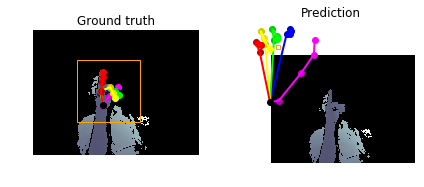

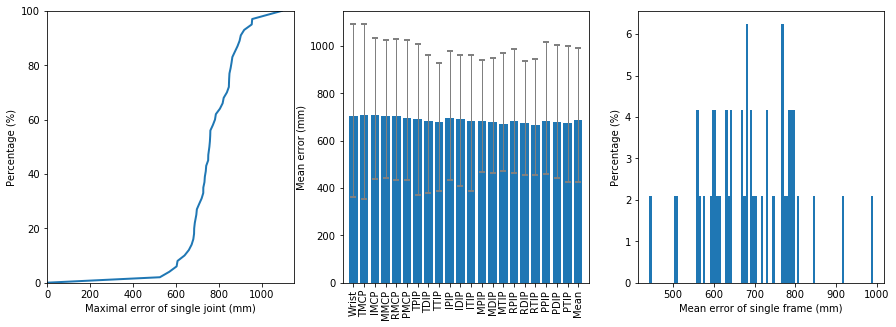

In [8]:
%load_ext autoreload
%autoreload 2
# %run 'train/evaluate.py' --model_name='base_clean'
%run 'train/evaluate.py' --model_name='ortho3view' --max_epoch=2 --batch_size=16 --store_level=6

In [ ]:
# load libraries and set plot parameters
import numpy as np
import prettytable as pt

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "sans-serif"
# plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

# data = np.array([[1,2,3],[2,3,4]])
# x = pt.PrettyTable(["City name", "Area", "Population", "Annual Rainfall"])
# x.align["City name"] = "l" # Left align city names
# x.add_row(["Adelaide",1295, 1158259, 600.5])
# x.add_row(["Brisbane",5905, 1857594, 1146.4])
# x.add_row(["Darwin", 112, 120900, 1714.7])
# x.add_row(["Hobart", 1357, 205556, 619.5])
# x.add_row(["Sydney", 2058, 4336374, 1214.8])
# x.add_row(["Melbourne", 1566, 3806092, 646.9])
# x.add_row(["Perth", 5386, 1554769, 869.4])
# print(x)

\usepackage{dsfont}

###### $\tau$-ratio
The ratio of frames that have all of their respectively detected joints within a certain error bound $\tau$ to the groundtruth annotation:
$$
\tau\mbox{-}ratio = \frac{\sum_i \mathds{1}( max_j(\epsilon_{ij}) \le \tau )}{N},
$$
where $\epsilon_{ij} = \left\lVert p_{ij} - g_{ij} \right\rVert$ is the error of $j$-th joint in the $i$-th frame, and $\mathds{1}$ is the indicator function.

###### Per-joint mean error
The mean error for the $j$-th joint between prediction and groundtruth over all test frames:
$$
\epsilon^{mean}_j = \frac{\sum_i \epsilon_{ij}}{N}.
$$

###### Mean error distribution
The mean error of all joints within each single frame is collected into a histogram to evaluate the overall performance:
$$
\epsilon^{mean}_i = \frac{\sum_j \epsilon_{ij}}{J}.
$$

In [2]:
%load_ext autoreload
%autoreload 2
import sys; sys.argv=['']; del sys
from args_holder import args_holder

argsholder = args_holder()
argsholder.parse_args()
ARGS = argsholder.args
ARGS.model_name='ortho3view'
ARGS.batch_size = 16
ARGS.store_level=6
ARGS.max_epoch = 1
argsholder.create_instance()
data_inst = ARGS.data_inst

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
total number of images: 999
splitted data: [  0 945] training, [945 999] test.
images are splitted out for evaluation: 64 portions
[ortho3view] preparing data: 945 lines, subdivided into 158 files 
              (producing 0.0003 GB for store size 6) ...


100% [==========================================================] Time: 0:00:39


[ortho3view] preparing data: 54 lines, subdivided into 9 files 
              (producing 0.0003 GB for store size 6) ...


data prepared: /home/xwu/projects/hand-maps/output/hands17/ortho3v


100% [==========================================================] Time: 0:00:02


In [3]:
import os
from train.train_abc import train_abc

trainer = train_abc(ARGS, False)

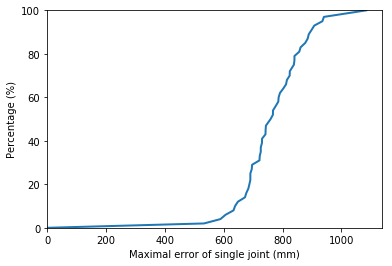

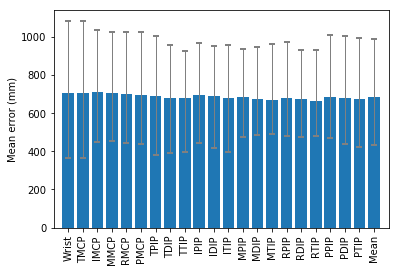

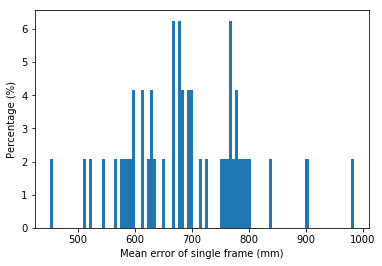

In [5]:
import matplotlib.pyplot as mpplot
dataeval = import_module(
    'data.' + ARGS.data_name + '.eval')

errors = dataeval.compare_error(
    data_inst,
    data_inst.annotation_test,
    ARGS.model_inst.predict_file
)
mpplot.subplot()
dataeval.draw_error_percentage_curve(errors, mpplot.gca())
mpplot.show()
mpplot.subplot()
dataeval.draw_error_per_joint(errors, mpplot.gca(), data_inst.join_name)
mpplot.subplot()
mpplot.show()
dataeval.draw_mean_error_distribution(errors, mpplot.gca())
mpplot.show()

drawing image #144: /home/xwu/data/hands17/training/images/image_D00000144.png


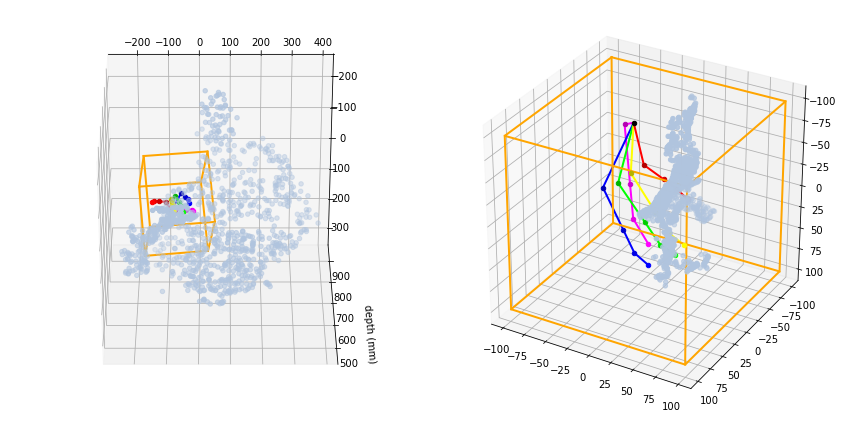

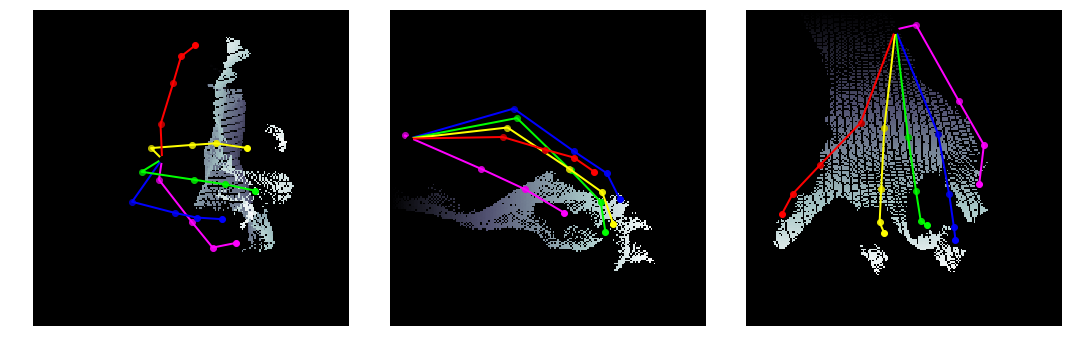

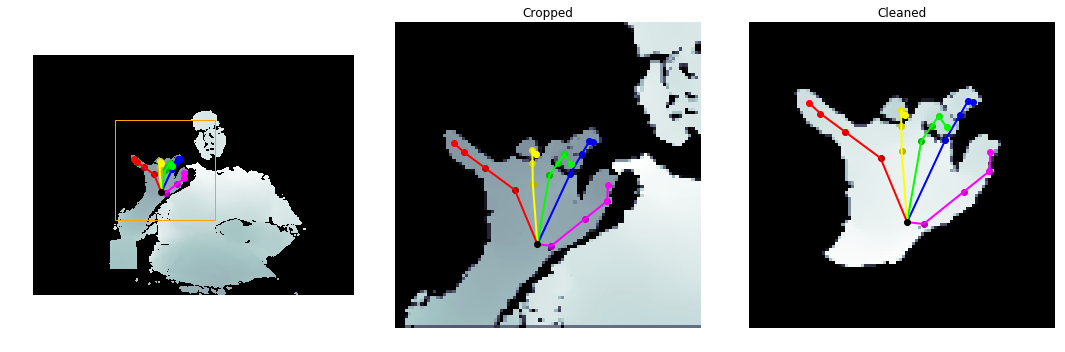

144

In [6]:
# %matplotlib notebook
from importlib import import_module
datadraw = import_module(
    'data.' + ARGS.data_name + '.draw')

datadraw.draw_raw3d_random(
    data_inst,
    data_inst.training_images,
    data_inst.annotation_cleaned
)